In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
df = pd.read_csv('../data/processed/air_quality_cleaned.csv')

In [4]:
X = df.drop(['PM2.5', 'Date'], axis=1, errors='ignore')
y = df['PM2.5']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
rf_model = joblib.load('../models/pollution_model.pkl')
print("Model loaded successfully!")

Model loaded successfully!


In [ ]:
y_pred = rf_model.predict(X_test)

In [12]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")


Model Evaluation Metrics:
Mean Squared Error (MSE): 91.46
Root Mean Squared Error (RMSE): 9.56
Mean Absolute Error (MAE): 5.96
R^2 Score: 0.81


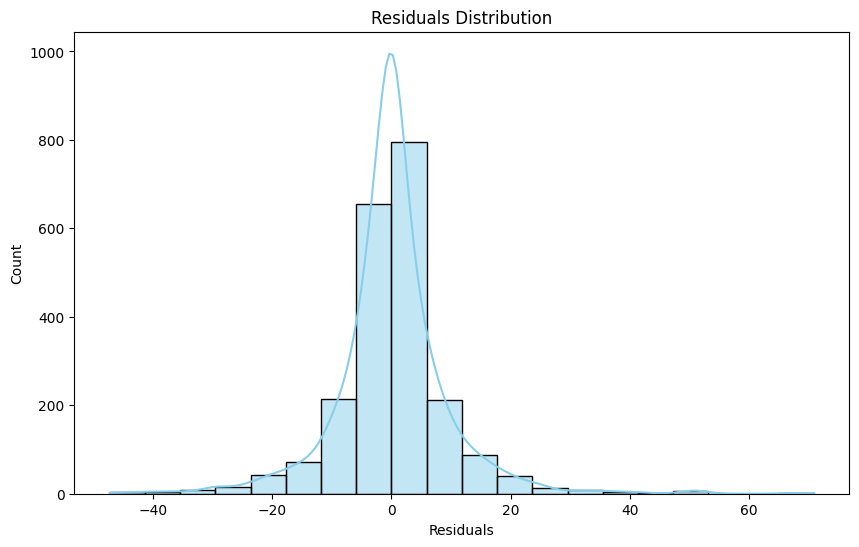

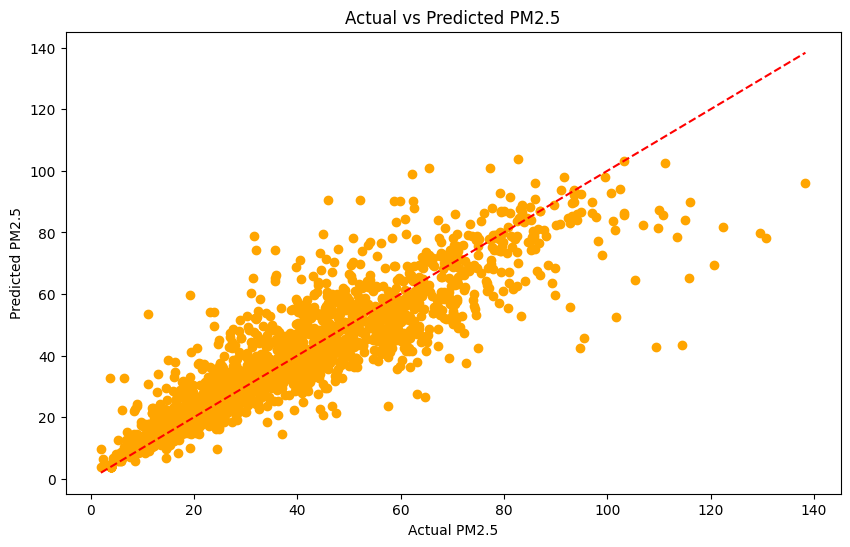

In [13]:
residuals = y_test - y_pred

plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True, bins=20, color='skyblue')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('Actual vs Predicted PM2.5')
plt.show()


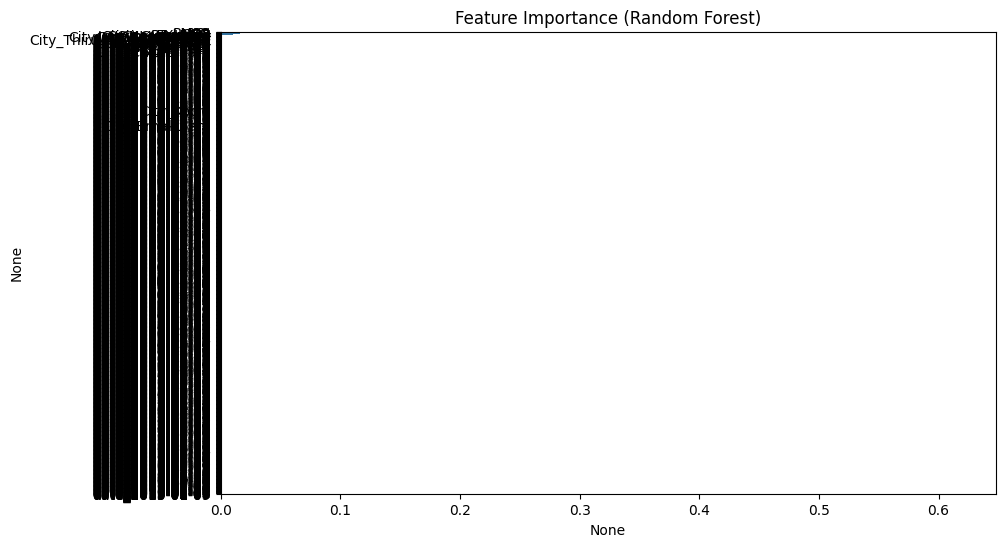

In [14]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.title("Feature Importance (Random Forest)")
plt.show()